In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Space_Corrected.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [5]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [7]:
df.isna().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [12]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Company Analysis

In [13]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [14]:
df[df['Company Name'] == "SpaceX"][df['Status Mission'] == "Failure"][['Company Name', 'Status Mission']]

C:\Users\subha\AppData\Local\Temp\ipykernel_13476\2089785854.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Company Name'] == "SpaceX"][df['Status Mission'] == "Failure"][['Company Name', 'Status Mission']]


,Company Name,Status Mission
499,SpaceX,Failure
808,SpaceX,Failure
879,SpaceX,Failure
929,SpaceX,Failure


In [15]:
temp = df["Company Name"].value_counts().reset_index()[:28]
temp

,index,Company Name
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


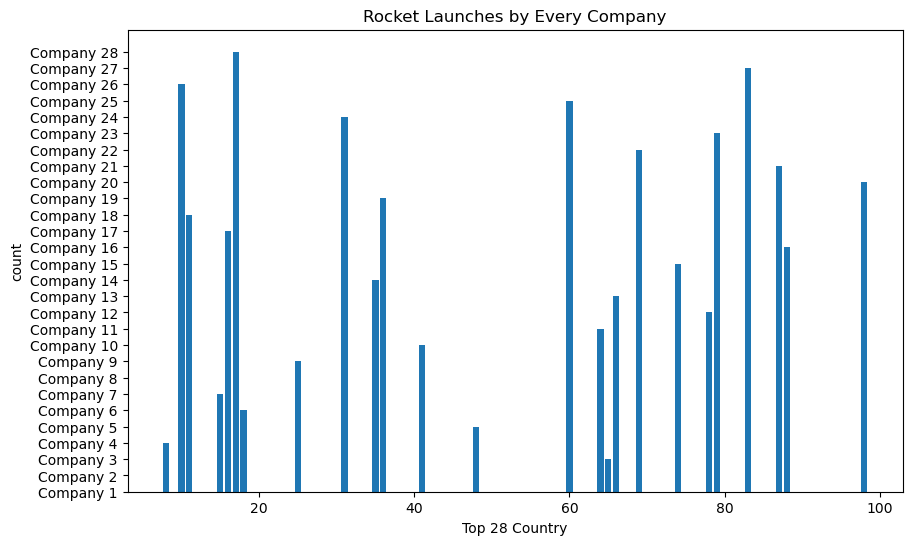

In [16]:
import matplotlib.pyplot as plt
import numpy as np

temp = np.random.randint(1, 100, size=28)
company_names = ["Company 1", "Company 2", "Company 3", "Company 4", "Company 5",
                 "Company 6", "Company 7", "Company 8", "Company 9", "Company 10",
                 "Company 11", "Company 12", "Company 13", "Company 14", "Company 15",
                 "Company 16", "Company 17", "Company 18", "Company 19", "Company 20",
                 "Company 21", "Company 22", "Company 23", "Company 24", "Company 25",
                 "Company 26", "Company 27", "Company 28"]

fig = plt.figure(figsize=(10, 6))

plt.bar(temp, company_names)

plt.title("Rocket Launches by Every Company")
plt.xlabel("Top 28 Country")
plt.ylabel("count")

plt.show()

# Mission Status

In [36]:
SM = df["Status Mission"].value_counts().reset_index()
SM=SM.rename(columns={"index":"Status Mission","Status Mission":"Frequency"})
SM

,Status Mission,Frequency
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [38]:
fig = px.pie(SM,values = "Frequency",names = "Status Mission",title="Mission Status")
fig.show()

# Rocket Status

In [39]:
Rocket_Status=df["Status Rocket"].value_counts()

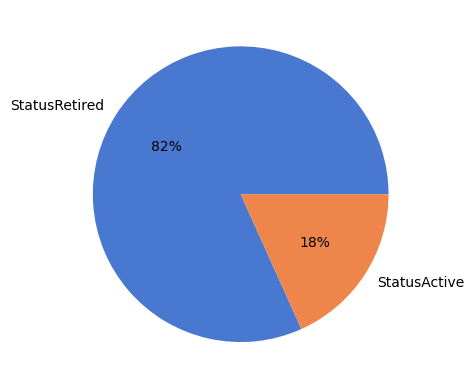

In [40]:
Rocket_Status=df["Status Rocket"].value_counts()
palette_color = sns.color_palette('muted')
plt.pie(Rocket_Status,labels=Rocket_Status.index,colors=palette_color,autopct='%.0f%%')
plt.show()

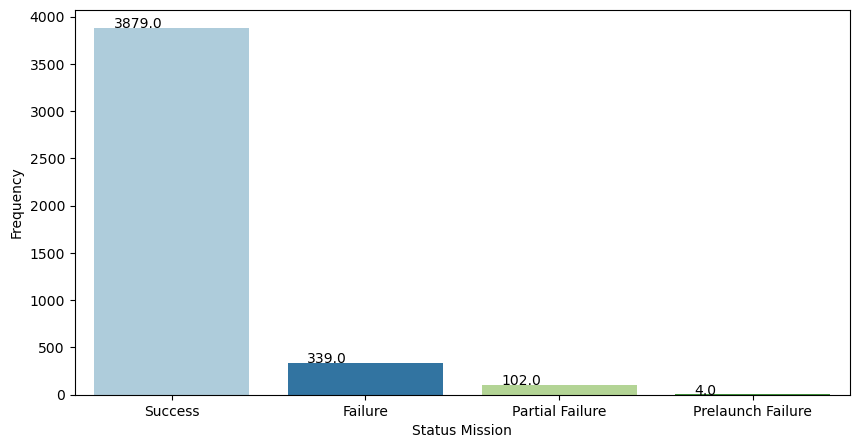

In [43]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=SM,x=SM['Status Mission'],y=SM.Frequency,errwidth=1,palette="Paired")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+1))

plt.show()

# Rocket Analysis

In [48]:
df.isna().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [49]:
np.sum(pd.isna(df.loc[:, " Rocket"]))

3360

In [50]:
df_ = df.dropna(subset = [" Rocket"], axis = "rows")
len(df_)

964

In [51]:
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

C:\Users\subha\AppData\Local\Temp\ipykernel_13476\3502872187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\subha\AppData\Local\Temp\ipykernel_13476\3502872187.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\subha\AppData\Local\Temp\ipykernel_13476\3502872187.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, 

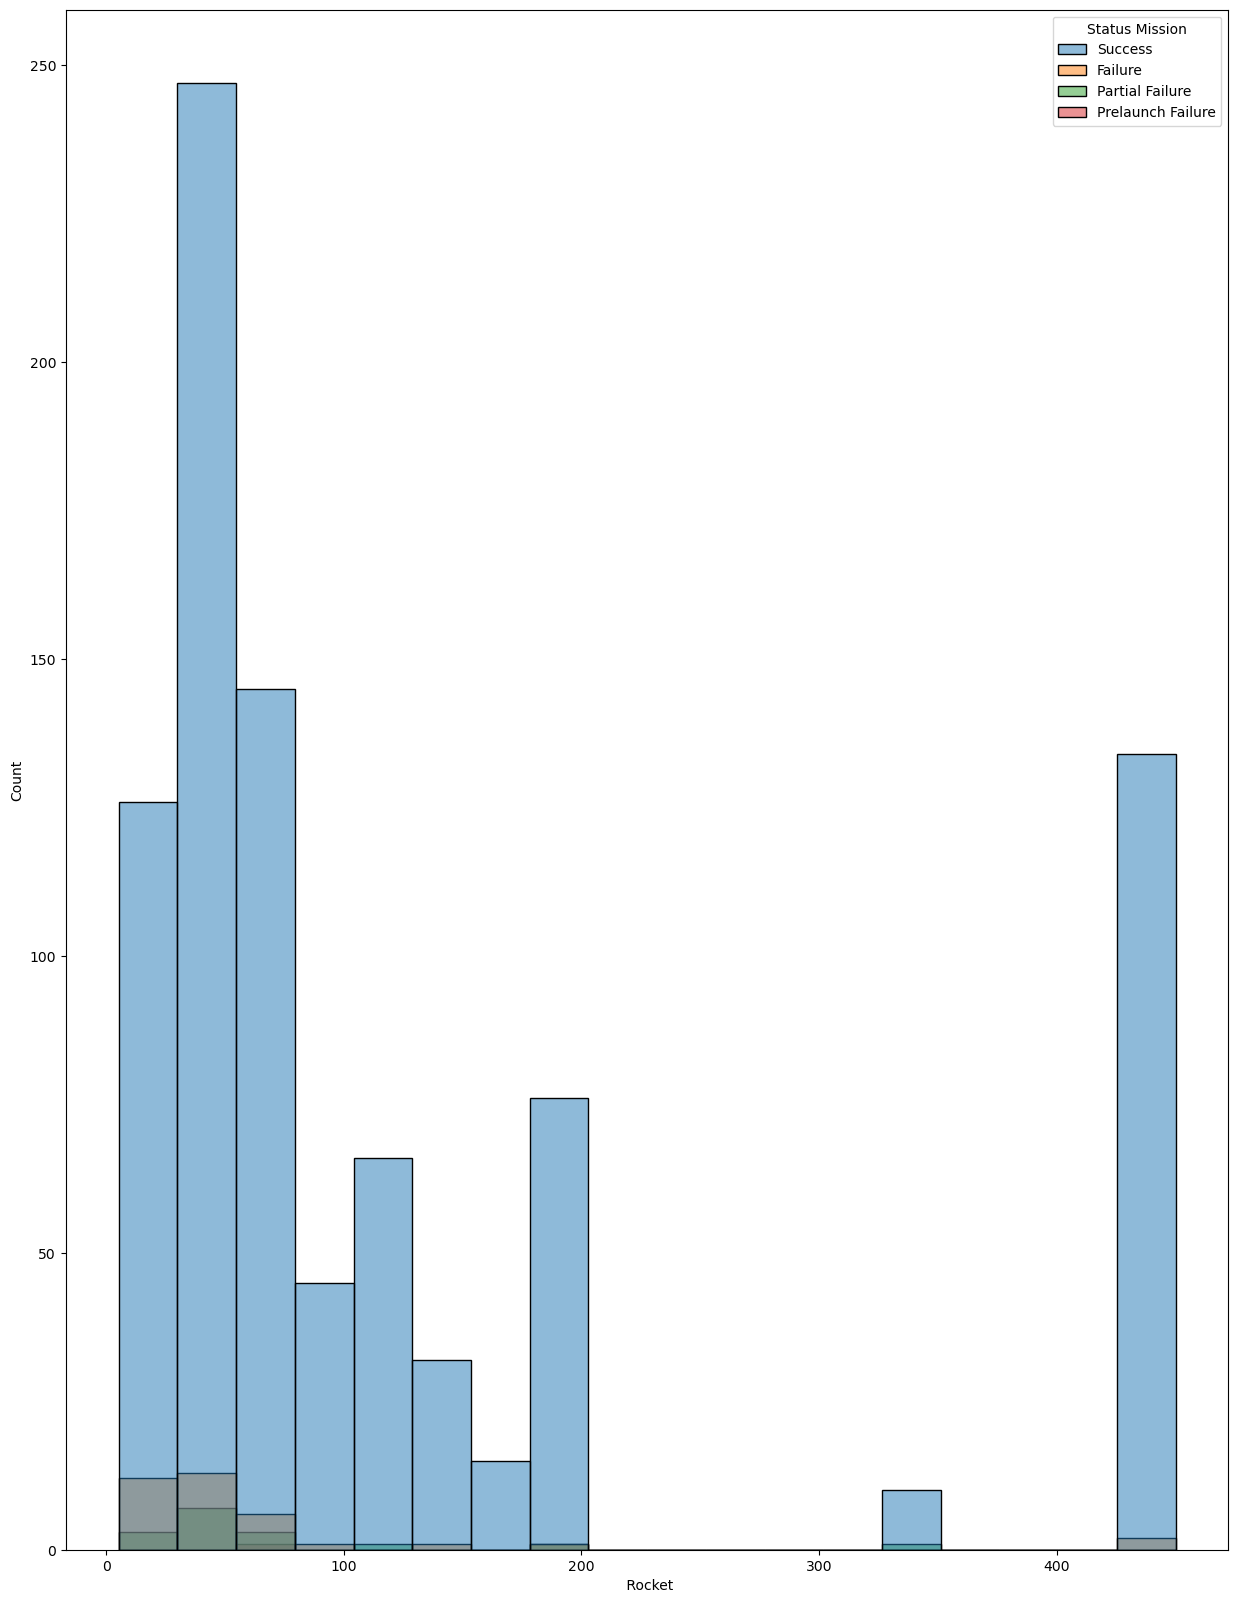

In [52]:
df_d = df_[df_.loc[:, " Rocket"] < 1000]
plt.figure(figsize = (15, 20))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

In [54]:
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()

In [55]:
df_money

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00
5,Eurockot,543.40
6,ExPace,28.30
7,ILS,1320.00
8,ISRO,2177.00
9,JAXA,168.00


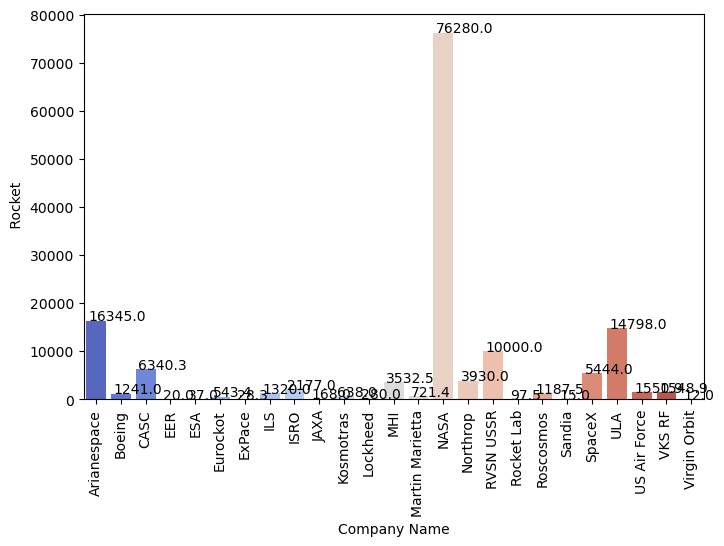

In [57]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_money,x=df_money['Company Name'],y=df_money[" Rocket"],errwidth=1,palette="coolwarm")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=90)
plt.show()

In [58]:
df_money_TOP5 = df_money.sort_values(by=[" Rocket"],ascending=False).reset_index()[:5]

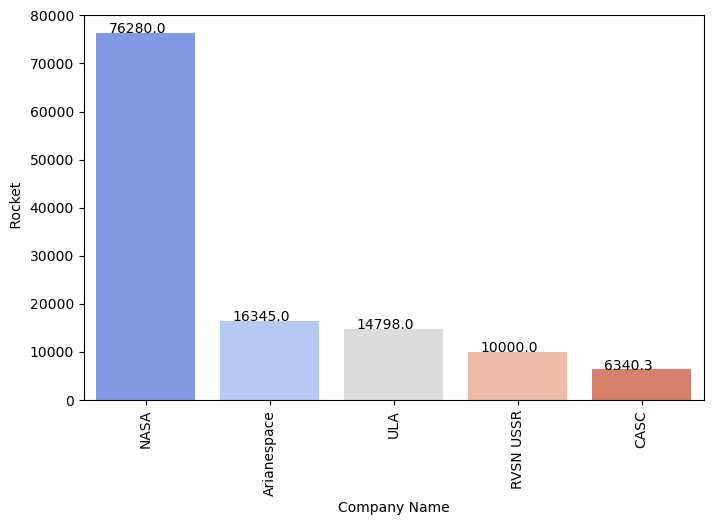

In [61]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=df_money_TOP5,x=df_money_TOP5['Company Name'],y=df_money_TOP5[" Rocket"],errwidth=1,palette="coolwarm")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=90)
plt.show()